# Deep Neural Network for Image Classificaton: Application

## 1 - Packages

In [3]:
# Import necessary libraries and modules
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

# Jupyter magic commands (must be standalone)
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set plot parameters for better visualization
plt.rcParams['figure.figsize'] = (5.0, 4.0)  # Default plot size
plt.rcParams['image.interpolation'] = 'nearest'  # Avoid interpolation for better clarity in images
plt.rcParams['image.cmap'] = 'gray'  # Default color map for images is grayscale

# Set random seed for reproducibility
np.random.seed(1)


## 2 - Dataset

In [5]:
# Load the dataset using the load_data function
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


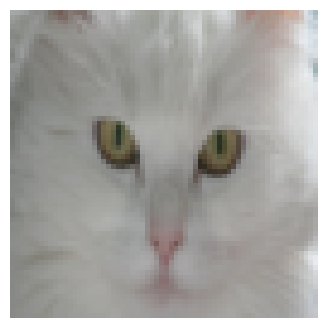

y = 1. It's a cat picture.


In [6]:
# Display an example image from the training dataset
index = 50  # Index of the image to display

# Plot the image at the specified index
plt.imshow(train_x_orig[index])
plt.axis('off')  # Hide axes for better visualization
plt.show()  # Display the image

# Print the corresponding label and class of the image
label_index = train_y[0, index]  # Get the label index
class_name = classes[label_index].decode("utf-8")  # Decode class name from bytes to string

# Output the label information
print(f"y = {label_index}. It's a {class_name} picture.")


In [7]:
# Explore the dataset
# Get the number of training examples and dimensions of the images
m_train = train_x_orig.shape[0]  # Number of training examples
num_px = train_x_orig.shape[1]    # Size of one dimension of each image
m_test = test_x_orig.shape[0]     # Number of testing examples

# Print dataset information
print(f"Number of training examples: {m_train}")
print(f"Number of testing examples: {m_test}")
print(f"Each image is of size: ({num_px}, {num_px}, 3)")  # Assuming images are in RGB format
print(f"train_x_orig shape: {train_x_orig.shape}")  # Shape of training images
print(f"train_y shape: {train_y.shape}")              # Shape of training labels
print(f"test_x_orig shape: {test_x_orig.shape}")      # Shape of testing images
print(f"test_y shape: {test_y.shape}")                # Shape of testing labels


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [8]:
# Reshape the training and test examples 
# Flatten the images from 3D to 2D (num_samples, num_features)
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T  # Transpose to have features as columns
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize the data by scaling pixel values to the range [0, 1]
train_x = train_x_flatten / 255.0  # Scale training data
test_x = test_x_flatten / 255.0     # Scale testing data

# Print the shapes of the standardized datasets
print(f"train_x's shape: {train_x.shape}")  # Shape after flattening and scaling
print(f"test_x's shape: {test_x.shape}")    # Shape after flattening and scaling


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 3 - Architecture of your model

### 3.1 - 2-layer neural network

### 3.2 - L-layer deep neural network

### 3.2 - General methodology

## 4 - Two-layer neural network

In [14]:
# Define model hyperparameters
n_x = 12288  # Input layer size: 64 * 64 * 3 (flattened 64x64 RGB image)
n_h = 7      # Number of units in the hidden layer
n_y = 1      # Output layer size: 1 unit (binary classification)

# Tuple representing the dimensions of each layer in the model
layers_dims = (n_x, n_h, n_y)

# Print for verification
print(f"Model layer dimensions: {layers_dims}")


Model layer dimensions: (12288, 7, 1)


In [15]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR -> RELU -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input data of shape (n_x, number of examples)
    Y -- true labels of shape (1, number of examples), binary classification (1 = cat, 0 = non-cat)
    layers_dims -- tuple containing the dimensions of the layers (n_x, n_h, n_y)
    learning_rate -- learning rate for gradient descent (default is 0.0075)
    num_iterations -- number of optimization iterations (default is 3000)
    print_cost -- if True, prints the cost every 100 iterations
    
    Returns:
    parameters -- dictionary containing updated weights and biases (W1, b1, W2, b2)
    """
    
    np.random.seed(1)  # Set seed for reproducibility
    grads = {}         # Dictionary to store gradients
    costs = []         # To track cost during training
    m = X.shape[1]     # Number of training examples
    (n_x, n_h, n_y) = layers_dims  # Unpack layer dimensions

    # Initialize parameters (weights and biases) for both layers
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Extract weights and biases from parameters for easier access
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Gradient descent loop
    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute the cost function (cross-entropy loss)
        cost = compute_cost(A2, Y)
        
        # Backward propagation to calculate gradients
        dA2 = -(np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))  # Derivative of cost with respect to A2
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Store gradients in the grads dictionary
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update weights and biases using gradient descent
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Retrieve updated parameters for next iteration
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Optionally print the cost every 100 iterations and append to cost list
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {np.squeeze(cost)}")
            costs.append(cost)
    
    # Plot the cost over time to visualize learning
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()
    
    return parameters


Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.433916315122575
Cost after iteration 800: 0.40079775362038866
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.2468176821061485
Cost after iteration 1400: 0.19850735037466102
Cost after iteration 1500: 0.1744831811255665
Cost after iteration 1600: 0.1708076297809683
Cost after iteration 1700: 0.11306524562164712
Cost after iteration 1800: 0.09629426845937146
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.07439078704319078
Cost after iteration 2100: 0.0663074813226

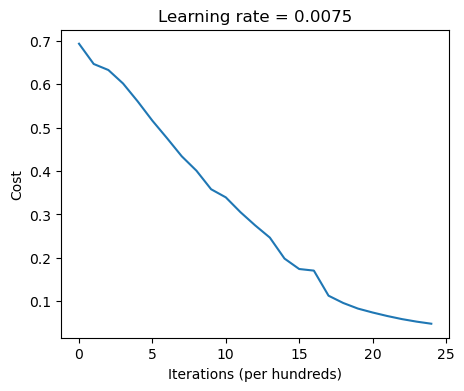

In [16]:
# Train a two-layer neural network model
# Arguments:
# train_x -- input training data, flattened and normalized (shape: (n_x, m_train))
# train_y -- labels for training data (shape: (1, m_train))
# layers_dims -- tuple defining the architecture (input size, hidden layer size, output size)
# num_iterations -- number of training iterations
# print_cost -- Boolean to control whether to print the cost every 100 iterations

parameters = two_layer_model(
    X=train_x,                # Training data (input features)
    Y=train_y,                # Training labels (target output)
    layers_dims=(n_x, n_h, n_y),  # Layer dimensions: input, hidden, and output sizes
    num_iterations=2500,      # Number of iterations for training
    print_cost=True           # Print the cost every 100 iterations
)


In [17]:
# Make predictions on the training set
# Arguments:
# train_x -- input training data (shape: (n_x, m_train))
# train_y -- true labels for the training data (shape: (1, m_train))
# parameters -- learned parameters from the trained model (dictionary containing W1, b1, W2, b2)

predictions_train = predict(
    X=train_x,    # Training data (input features)
    y=train_y,    # Training labels (actual target outputs)
    parameters=parameters  # Learned parameters from the trained model
)


Accuracy: 0.9999999999999998


In [18]:
# Make predictions on the test set
# Arguments:
# test_x -- input test data (shape: (n_x, m_test))
# test_y -- true labels for the test data (shape: (1, m_test))
# parameters -- learned parameters from the trained model (dictionary containing W1, b1, W2, b2)

predictions_test = predict(
    X=test_x,    # Test data (input features)
    y=test_y,    # Test labels (actual target outputs)
    parameters=parameters  # Learned parameters from the trained model
)


Accuracy: 0.72


## 5 - L-layer Neural Network

In [20]:
# Define constants for the 4-layer neural network model architecture
# layers_dims is a list where each entry represents the number of units in a layer
# Input layer: 12288 units (image flattened to vector of size 12288, i.e., 64x64x3)
# Hidden layers: 20, 7, and 5 units respectively
# Output layer: 1 unit (binary classification: cat vs. non-cat)

layers_dims = [12288, 20, 7, 5, 1]  # Architecture of the 4-layer model


In [21]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a multi-layer (L-layer) neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- Input data, numpy array of shape (number of features, number of examples)
    Y -- True "label" vector (0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- List containing the size of each layer, including input and output layers.
    learning_rate -- Learning rate for gradient descent optimization
    num_iterations -- Number of iterations for the training loop
    print_cost -- If True, prints the cost every 100 iterations
    
    Returns:
    parameters -- Dictionary containing the updated parameters (weights and biases) of the model.
    """

    # Set random seed for reproducibility
    np.random.seed(1)
    costs = []  # List to track cost during optimization

    # Initialize parameters for the L-layer network
    parameters = initialize_parameters_deep(layers_dims)

    # Gradient descent loop
    for i in range(num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
        AL, caches = L_model_forward(X, parameters)

        # Compute cost for the current iteration
        cost = compute_cost(AL, Y)

        # Backward propagation to compute gradients
        grads = L_model_backward(AL, Y, caches)

        # Update parameters using gradient descent
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print and store the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
            costs.append(cost)

    # Plot the cost trend after training
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()

    return parameters


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


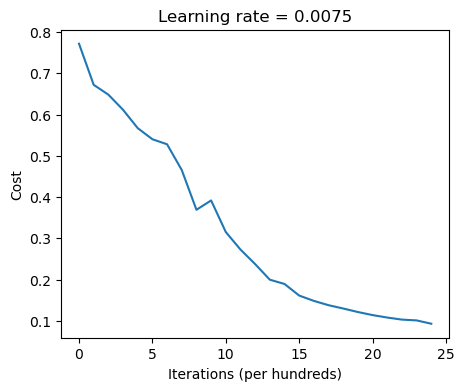

In [22]:
# Train the L-layer neural network model
# 'train_x' - input data for training (features), 'train_y' - true labels for training
# 'layers_dims' - list that defines the number of units in each layer of the network
# 'num_iterations' - number of iterations to run the training loop
# 'print_cost' - set to True to print cost during training

parameters = L_layer_model(
    X=train_x,               # Training data (features)
    Y=train_y,               # True labels for the training data
    layers_dims=layers_dims,  # List specifying the dimensions of each layer
    num_iterations=2500,      # Number of iterations for gradient descent
    print_cost=True           # Print the cost every 100 iterations
)


In [23]:
# Make predictions on the training data
# 'train_x' - input training data (features)
# 'train_y' - true labels for the training data
# 'parameters' - trained parameters of the model

pred_train = predict(
    X=train_x,            # Input training data
    y=train_y,            # True labels for training data
    parameters=parameters  # Trained parameters from the model
)


Accuracy: 0.9856459330143539


In [24]:
# Make predictions on the test data
# 'test_x' - input test data (features)
# 'test_y' - true labels for the test data
# 'parameters' - trained parameters of the model

pred_test = predict(
    X=test_x,             # Input test data
    y=test_y,             # True labels for test data
    parameters=parameters  # Trained parameters from the model
)


Accuracy: 0.8


## 6 - Results Analysis

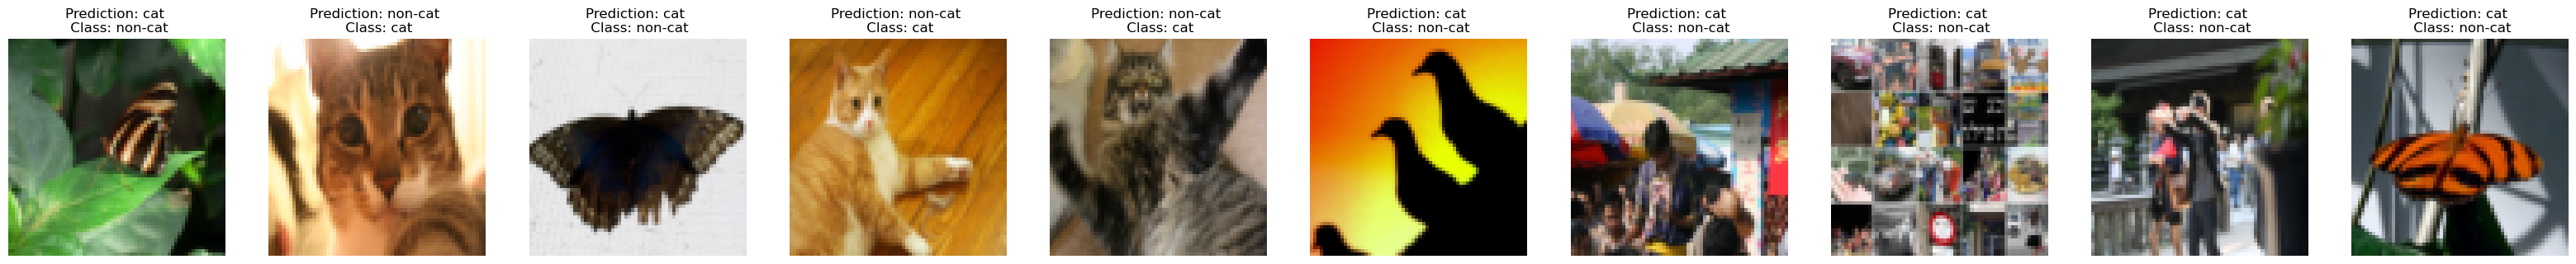

In [26]:
# Display mislabeled images from the test set
# 'classes' - list of class labels (e.g., ["non-cat", "cat"])
# 'test_x' - input test data (features)
# 'test_y' - true labels for the test data
# 'pred_test' - predicted labels from the model on the test data

print_mislabeled_images(
    classes=classes,  # Class labels to interpret the predictions
    X=test_x,         # Input test images
    y=test_y,         # True labels for the test images
    p=pred_test   # Predicted labels from the model
)


## 7 - Test with your own image

Accuracy: 1.0


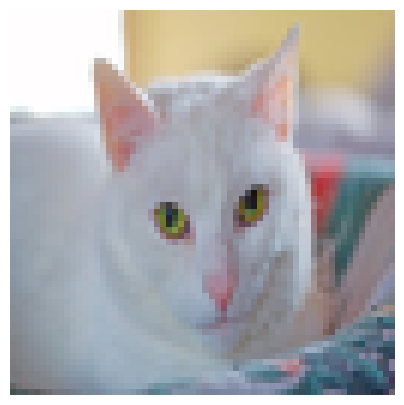

y = 1, your L-layer model predicts a "cat" picture.


In [28]:
from PIL import Image

# Open, convert to RGB, and resize the image to the model's expected input size
file_image = Image.open("test.png").convert("RGB").resize((num_px, num_px), Image.Resampling.LANCZOS)

# Define the true label for the image (1 -> cat, 0 -> non-cat)
my_label_y = np.array([1])  # Use an array for consistency with model input

# Convert the image to a numpy array and preprocess it
image = np.array(file_image)
my_image = image.reshape(num_px * num_px * 3, 1) / 255.0  # Flatten and normalize the image

# Predict using the trained model
my_predicted_image = predict(my_image, my_label_y, parameters)

# Set the figure size (width, height in inches)
plt.figure(figsize=(5, 5))  # Adjust the size as needed

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis for better visualization
plt.show()

# Print the prediction result with class labels
predicted_class = int(np.squeeze(my_predicted_image))  # Get predicted class as an integer
predicted_label = classes[predicted_class].decode("utf-8")  # Decode to string

print(f"y = {predicted_class}, your L-layer model predicts a \"{predicted_label}\" picture.")


In [51]:
import pickle  # For serializing and deserializing Python objects

# Data to be saved into a .pickle file
my_content = [train_x_orig, train_y, test_x_orig, test_y, classes]

# Save the variables into a .pickle file
def save_data_to_pickle(data, filename):
    """
    Saves the provided data to a .pickle file.

    Args:
    data: List or any other Python object to be saved.
    filename: Name of the file to save the data (with .pickle extension).
    """
    with open(filename, 'wb') as file:  # Open file in binary write mode
        pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)  # Save data using the highest protocol for efficiency

# Load variables from a .pickle file
def load_data_from_pickle(filename):
    """
    Loads data from a given .pickle file.

    Args:
    filename: Name of the .pickle file to load.

    Returns:
    Loaded data from the file.
    """
    with open(filename, 'rb') as file:  # Open file in binary read mode
        return pickle.load(file)  # Return the deserialized Python object

# Example usage:

# Saving the dataset
save_data_to_pickle(my_content, "trainingDataset.pickle")

# Loading the dataset
train_x_orig, train_y, test_x_orig, test_y, classes = load_data_from_pickle('trainingDataset.pickle')
